In [80]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from math import sqrt
from sklearn import metrics
from datetime import datetime

In [69]:
df_base0 = pd.read_csv('./output/sample_submission.csv', names=['ID_code', 'target0'], skiprows=[0],header=None)
df_base1 = pd.read_csv('./output/naive_bayes_submission_0.903.csv', names=['ID_code', 'target1'], skiprows=[0],header=None)
df_base2 = pd.read_csv('./output/LogisticRegression_086.csv', names=['ID_code', 'target2'], skiprows=[0],header=None)
# df_base3 = pd.read_csv('./output/submission_0.8965.csv', names=['ID_code', 'target3'], skiprows=[0],header=None)
df_base4 = pd.read_csv('./output/submission_5x-LinearSVC-01-v1_0859008_2019-03-22-01-47.csv', names=['ID_code', 'target4'], skiprows=[0],header=None)
df_base5 = pd.read_csv('./output/submission_new_var5_0.9005.csv', names=['ID_code', 'target5'], skiprows=[0],header=None)
df_base6 = pd.read_csv('./output/PCA_submission0.9013206899625816.csv', names=['ID_code', 'target6'], skiprows=[0],header=None)
# df_base7 = pd.read_csv('./output/super_blend.csv', names=['ID_code', 'target7'], skiprows=[0],header=None)
df_base8 = pd.read_csv('./output/PCA_submission0.9010933404229471.csv', names=['ID_code', 'target8'], skiprows=[0],header=None)
df_base9 = pd.read_csv('./output/submission_new_var5_0.9005.csv', names=['ID_code', 'target9'], skiprows=[0],header=None)
df_base10 = pd.read_csv('./output/submission_new_var4_0.9005.csv', names=['ID_code', 'target10'], skiprows=[0],header=None)
# df_base11 = pd.read_csv('./output/best_public_blend2_0.900.csv', names=['ID_code', 'target11'], skiprows=[0],header=None)
df_base12 = pd.read_csv('./output/submission_new_var_0.8995.csv', names=['ID_code', 'target12'], skiprows=[0],header=None)



submission = pd.read_csv('./sample_submission.csv')


/Users/Takashi/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/Takashi/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


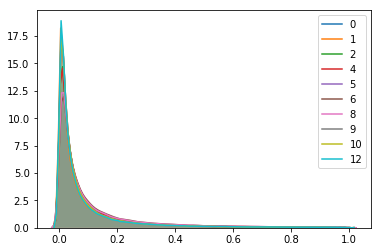

In [70]:
sns.kdeplot(df_base0['target0'], label = '0', shade = True)
sns.kdeplot(df_base1['target1'], label = '1', shade = True)
sns.kdeplot(df_base2['target2'], label = '2', shade = True)
# sns.kdeplot(df_base3['target3'], label = '3', shade = True)
sns.kdeplot(df_base4['target4'], label = '4', shade = True)
sns.kdeplot(df_base5['target5'], label = '5', shade = True)
sns.kdeplot(df_base6['target6'], label = '6', shade = True)
# sns.kdeplot(df_base7['target7'], label = '7', shade = True)
sns.kdeplot(df_base8['target8'], label = '8', shade = True)
sns.kdeplot(df_base9['target9'], label = '9', shade = True)
sns.kdeplot(df_base10['target10'], label = '10', shade = True)
# sns.kdeplot(df_base11['target11'], label = '11', shade = True)
sns.kdeplot(df_base12['target12'], label = '12', shade = True)

In [71]:
df_base = pd.merge(df_base0,df_base1,how='inner',on='ID_code')
df_base = pd.merge(df_base,df_base2,how='inner',on='ID_code')
# df_base = pd.merge(df_base,df_base3,how='inner',on='ID_code')
df_base = pd.merge(df_base,df_base4,how='inner',on='ID_code')
df_base = pd.merge(df_base,df_base5,how='inner',on='ID_code')
df_base = pd.merge(df_base,df_base6,how='inner',on='ID_code')
# df_base = pd.merge(df_base,df_base7,how='inner',on='ID_code')
df_base = pd.merge(df_base,df_base8,how='inner',on='ID_code')
df_base = pd.merge(df_base,df_base9,how='inner',on='ID_code')
df_base = pd.merge(df_base,df_base10,how='inner',on='ID_code')
# df_base = pd.merge(df_base,df_base11,how='inner',on='ID_code')
df_base = pd.merge(df_base,df_base12,how='inner',on='ID_code')

In [72]:
df_base.to_csv('blend_2', index=False)

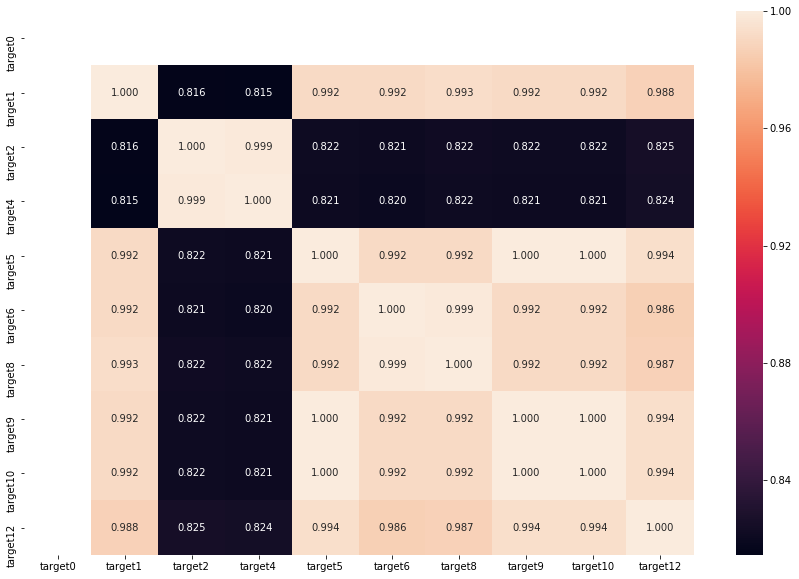

In [73]:
plt.figure(figsize=(15,10))
# sns.heatmap(df_base.iloc[:,1:].corr(),annot=True,fmt=".2f")
pearson = df_base.corr(method = 'pearson')
sns.heatmap(pearson, annot=True, fmt=".3f")

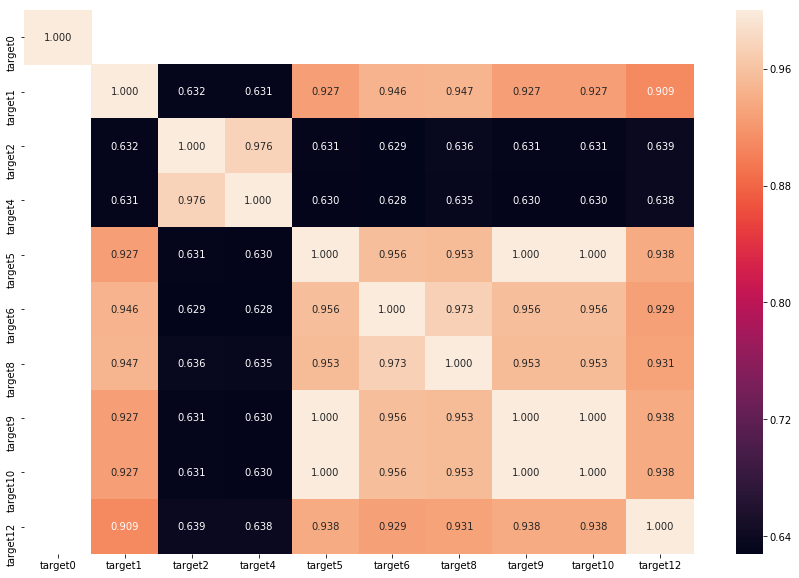

In [74]:
plt.figure(figsize=(15,10))
kendall = df_base.corr(method = 'kendall')
sns.heatmap(kendall, annot = True, fmt = ".3f")

In [75]:
pca = PCA(n_components = 1)
factor = pca.fit_transform(df_base.iloc[:, 1:])
print(pca.explained_variance_ratio_)

[0.9435166]


In [76]:
pca.components_

array([[0.        , 0.36236524, 0.27599552, 0.27349303, 0.32280455,
        0.3747594 , 0.38508221, 0.32280455, 0.32280455, 0.34114253]])

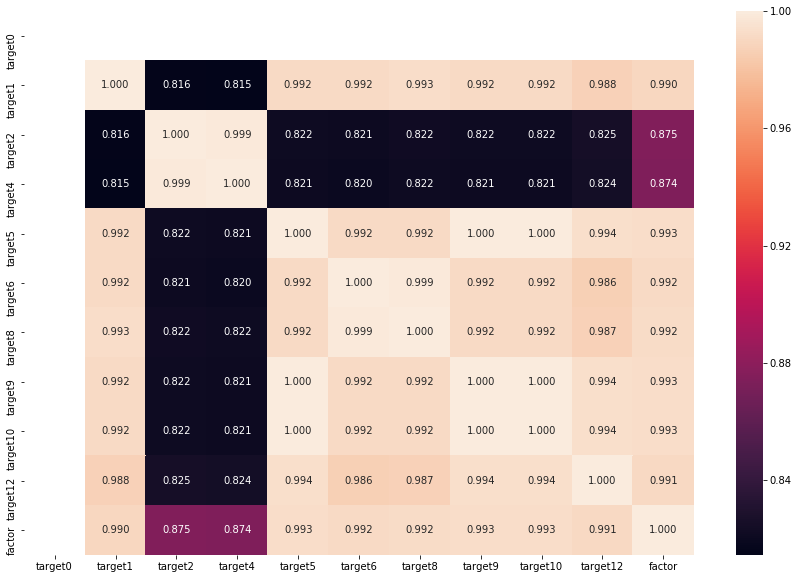

In [77]:
plt.figure(figsize=(15,10))
df_base['factor'] = factor
pearson_pca = df_base.corr(method = 'pearson')
sns.heatmap(pearson_pca, annot = True, fmt = ".3f")

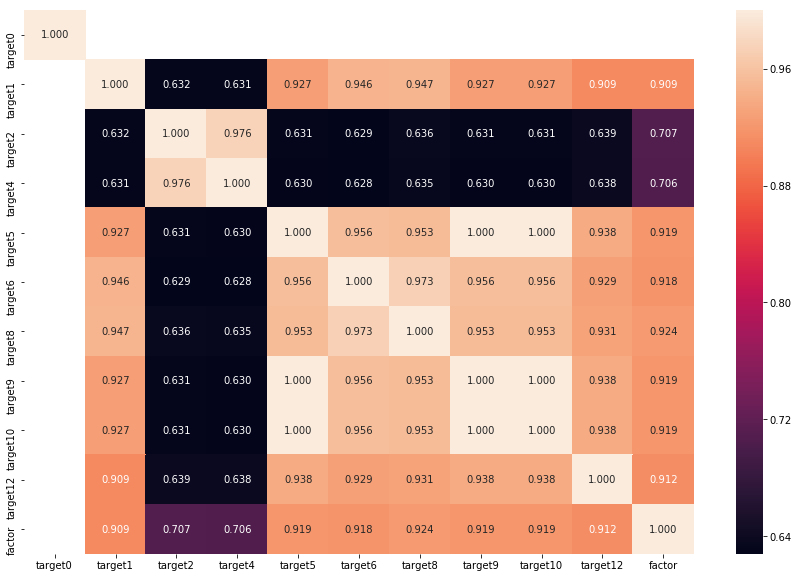

In [78]:
plt.figure(figsize=(15,10))
kendall_pca = df_base.corr(method = 'kendall')
sns.heatmap(kendall_pca, annot = True, fmt = ".3f")

In [81]:
submission['target'] = df_base['factor']

filename="blended_submission_{:%Y-%m-%d_%H_%M}.csv".format(datetime.now())
submission.to_csv(filename, index=False)